# origin, max, threshold 

In [2]:
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 

#img = mpimg.imread('image/0_BI1IAmhZxzc0H5u8_.png',0)
img = cv2.imread('image/haha.png',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(img)

max_img = np.max(a=img, axis=2)
img_c = max_img / 255.0
plt.subplot(132)
plt.imshow(img_c, cmap='gray')
ret , img_threshold = cv2.threshold(img_c, 0.4, 1, cv2.THRESH_TOZERO)
plt.subplot(133)
plt.imshow(img_threshold, cmap='gray')


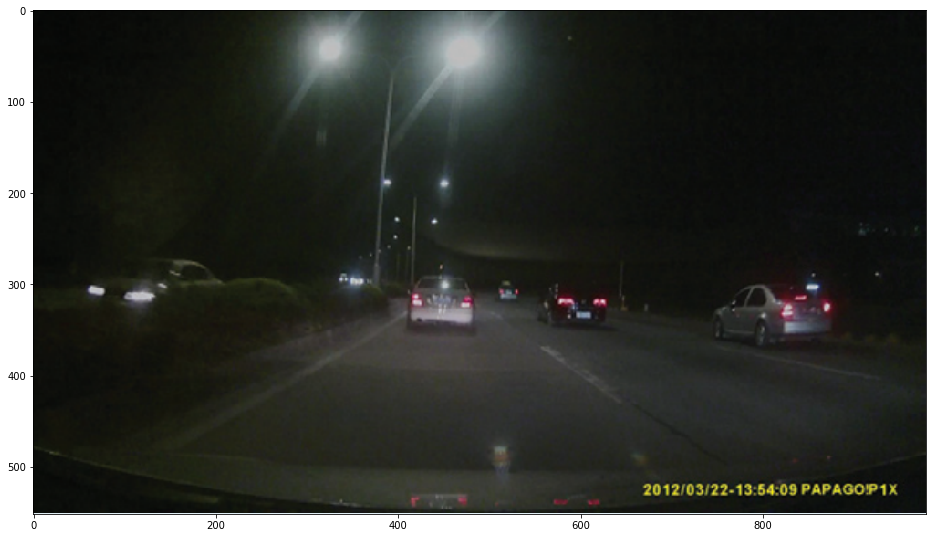

In [3]:
plt.figure(figsize=(16,16))
plt.imshow(img)

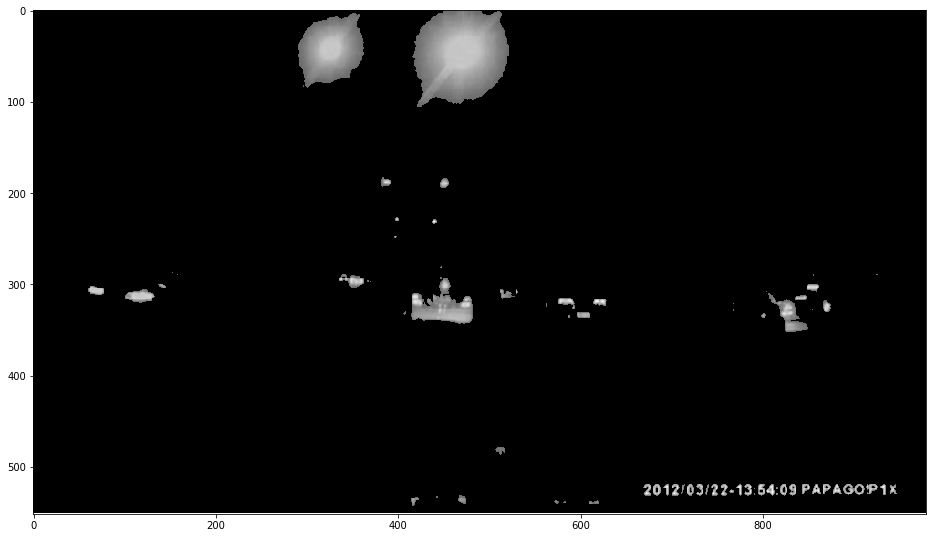

In [4]:
plt.figure(figsize=(16,16))
plt.imshow(img_threshold, cmap='gray')

In [5]:
print(img_threshold)
#plt.imshow(img_threshold)
#plt.colorbar()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.95294118 0.95294118 0.95294118 ... 0.95294118 0.95294118 0.95294118]]


In [6]:
height, width = img_threshold.shape
w_size=5
w_b=w_size//2
#plt.figure(figsize=(16,16))
image = img_threshold
omega = np.copy(image)
for y in range(0, height):#del
    for x in range(0, width):
        start = [x-w_b, y-w_b] #del
        end = [x+w_b,y+w_b]#del
        for i in range(2):#del
            if start[i]<0: start[i]=0#del
        if end[0]>=width-1: end[0]=width-1#del
        if end[1]>=height-1: end[1]=height-1 #del
        select = img_threshold[start[1]:end[1]+1, start[0]:end[0]+1]
        r2 = select **2
        omega[y,x] = np.mean(r2)
print(omega)
#plt.imshow(omega)
#plt.colorbar()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.18161938 0.18161938 0.18161938 ... 0.18161938 0.18161938 0.18161938]
 [0.22702422 0.22702422 0.22702422 ... 0.22702422 0.22702422 0.22702422]
 [0.30269896 0.30269896 0.30269896 ... 0.30269896 0.30269896 0.30269896]]


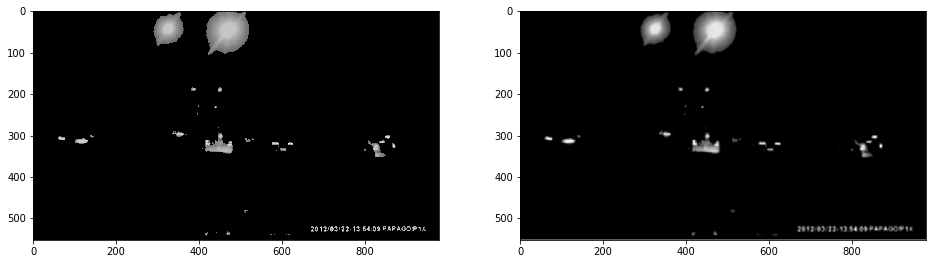

In [7]:
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img_threshold, cmap='gray')
plt.subplot(122)
plt.imshow(omega, cmap = 'gray')

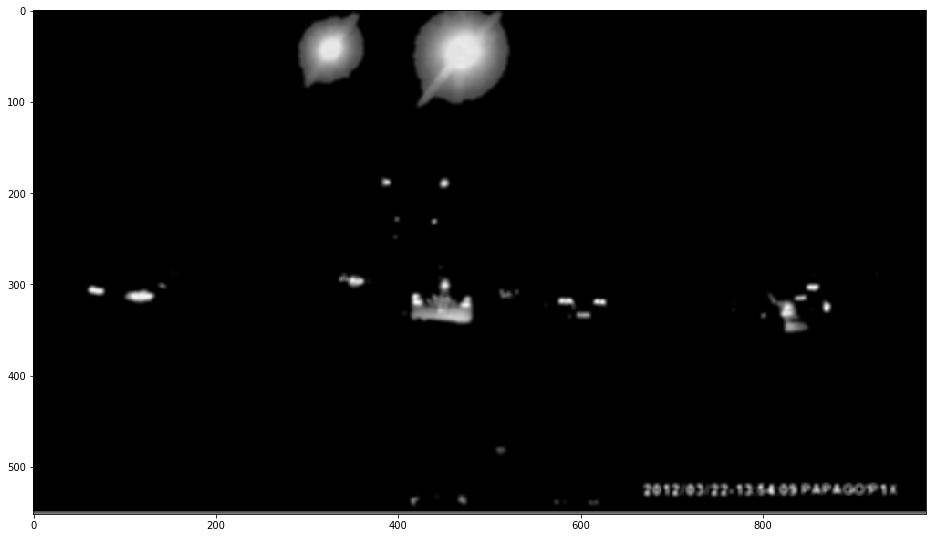

In [8]:
plt.figure(figsize=(16,16))
plt.imshow(omega, cmap='gray')

In [9]:
m=np.copy(img_threshold)
for y in range(0, height):
    for x in range(0, width):
        start = [x-w_b, y-w_b]
        end = [x+w_b,y+w_b]
        for i in range(2):
            if start[i]<0: start[i]=0
        if end[0]>=width-1: end[0]=width-1
        if end[1]>=height-1: end[1]=height-1
        select = img_threshold[start[1]:end[1]+1, start[0]:end[0]+1]
        r2 = select **2
        #denominator=np.mean( (r2-omega[y,x])**2 )
        #if (denominator==0.0): m[y,x]=r2.mean()
        #else: m[y,x] = (omega[y,x]**2) / denominator
        m[y,x] = (omega[y,x]**2) / np.mean( (r2-omega[y,x])**2 +.1)
print(m)
#plt.imshow(m)
#plt.colorbar()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.14221462 0.14221462 0.14221462 ... 0.14221462 0.14221462 0.14221462]
 [0.20241929 0.20241929 0.20241929 ... 0.20241929 0.20241929 0.20241929]
 [0.32347956 0.32347956 0.32347956 ... 0.32347956 0.32347956 0.32347956]]


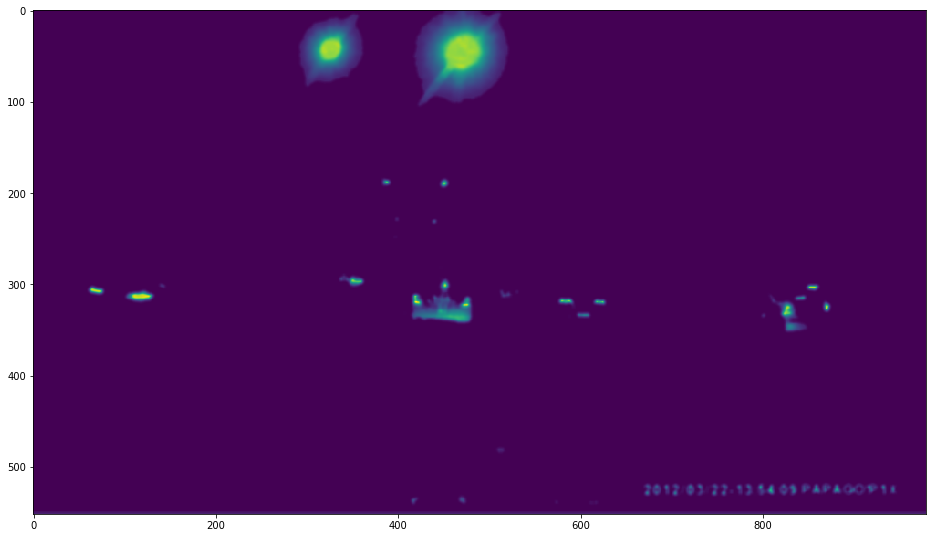

In [10]:
plt.figure(figsize=(16,16))
plt.imshow(m)

# Nakagami image

In [11]:
from scipy.stats import nakagami
img_nakagami = np.copy(image)
for y in range(0, height):
    for x in range(0, width):
        img_nakagami[y,x]=nakagami.pdf(img_nakagami[y,x], m[y,x])


//miniconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5062: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 [0.38081039 0.38081039 0.38081039 ... 0.38081039 0.38081039 0.38081039]]


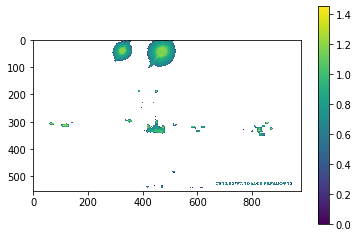

In [12]:
print(img_nakagami)
img_nakagami = img_nakagami+0
plt.imshow(img_nakagami)
plt.colorbar()

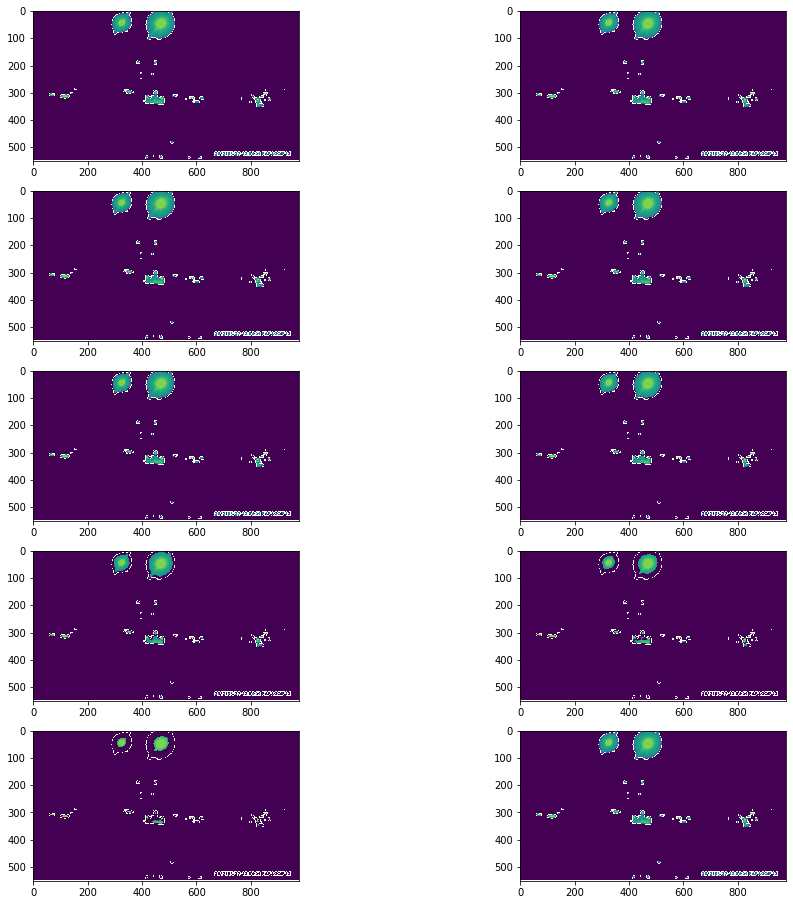

In [13]:
plt.figure(figsize=(16,16))
for i in range(10):
    ret, img_threshold2 = cv2.threshold(img_nakagami, i/10.0, 1, cv2.THRESH_TOZERO)
    plt.subplot(str(52)+str(i))
    plt.imshow(img_threshold2)

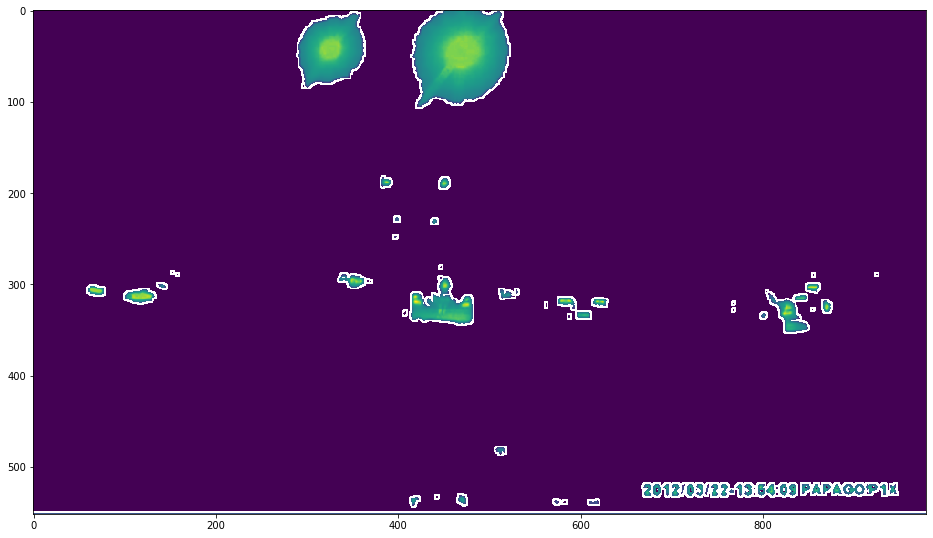

In [14]:
plt.figure(figsize=(16,16))
ret, img_threshold3 = cv2.threshold(img_nakagami, 0.1, 1, cv2.THRESH_TOZERO)
plt.imshow(img_threshold3)

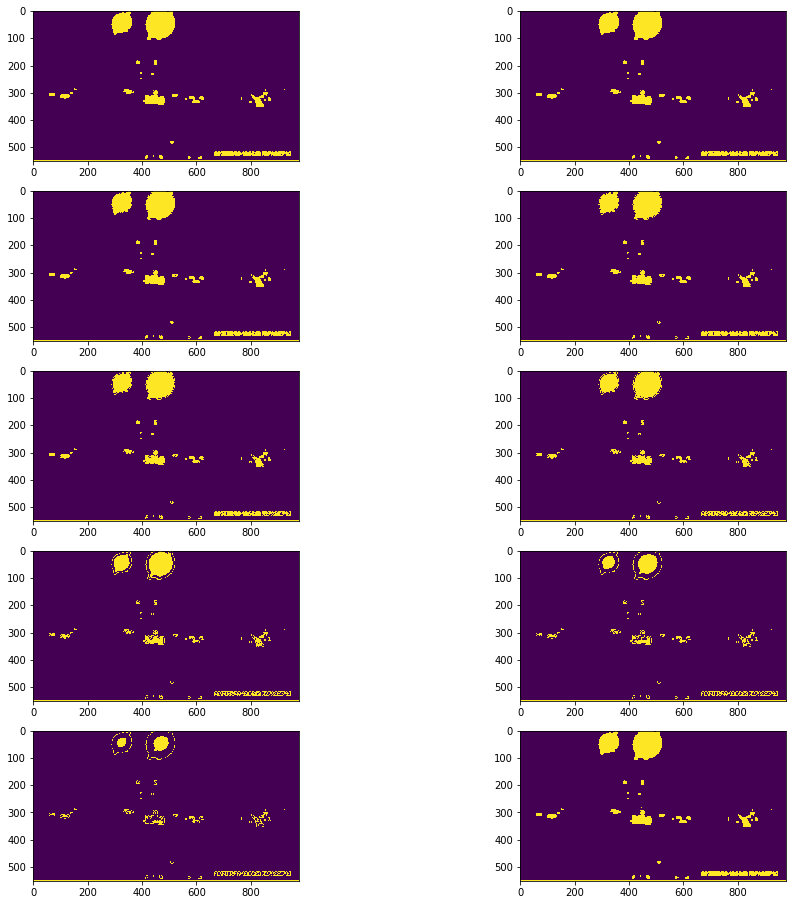

In [15]:
plt.figure(figsize=(16,16))
for i in range(10):
    ret, img_threshold4 = cv2.threshold(img_nakagami, i/10, 1, cv2.THRESH_BINARY)
    plt.subplot(str(52)+str(i))
    plt.imshow(img_threshold4)

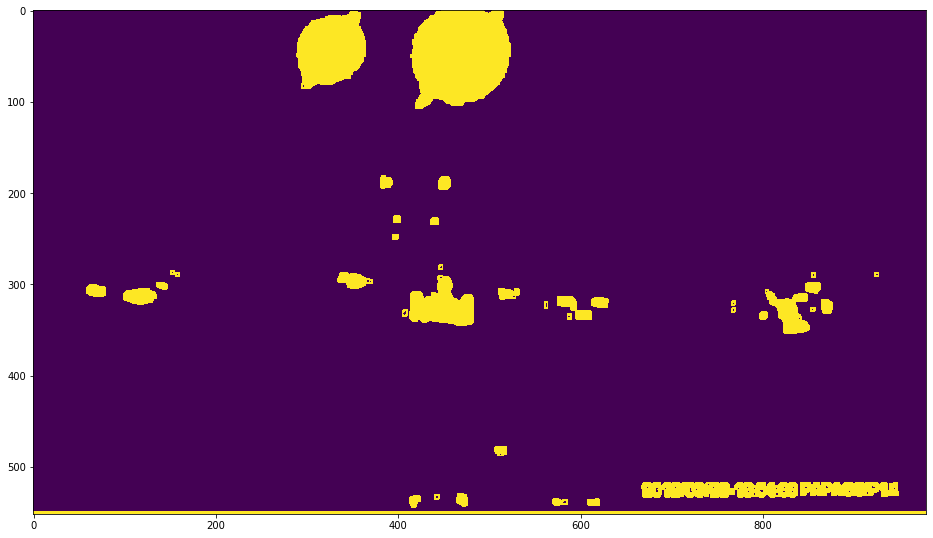

In [16]:
plt.figure(figsize=(16,16))
ret, img_threshold4 = cv2.threshold(img_nakagami, 0.1, 1, cv2.THRESH_BINARY)
plt.imshow(img_threshold4)

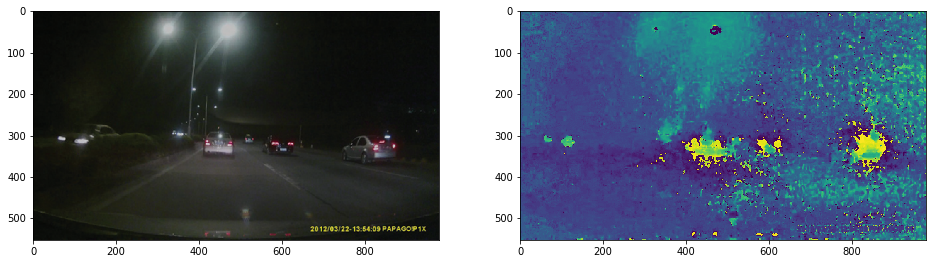

In [17]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(img_hsv[:,:,0])


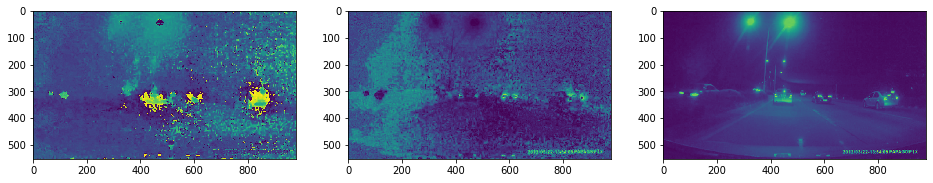

In [18]:
plt.figure(figsize=(16,16))
#H
plt.subplot(131)
plt.imshow(img_hsv[:,:,0])
#S
plt.subplot(132)
plt.imshow(img_hsv[:,:,1])
#V
plt.subplot(133)
plt.imshow(img_hsv[:,:,2])


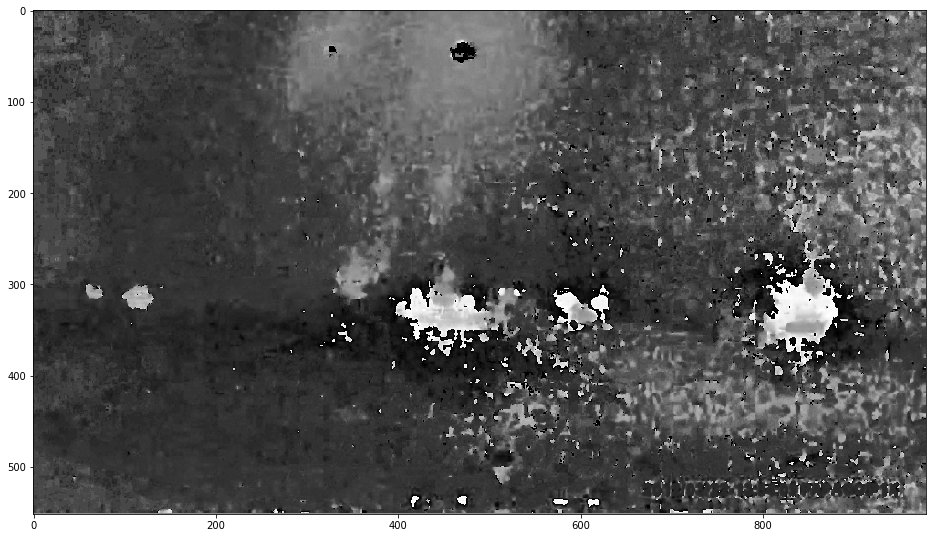

In [25]:
plt.figure(figsize=(16,16))
plt.imshow(img_hsv[:,:,0],cmap='gray')

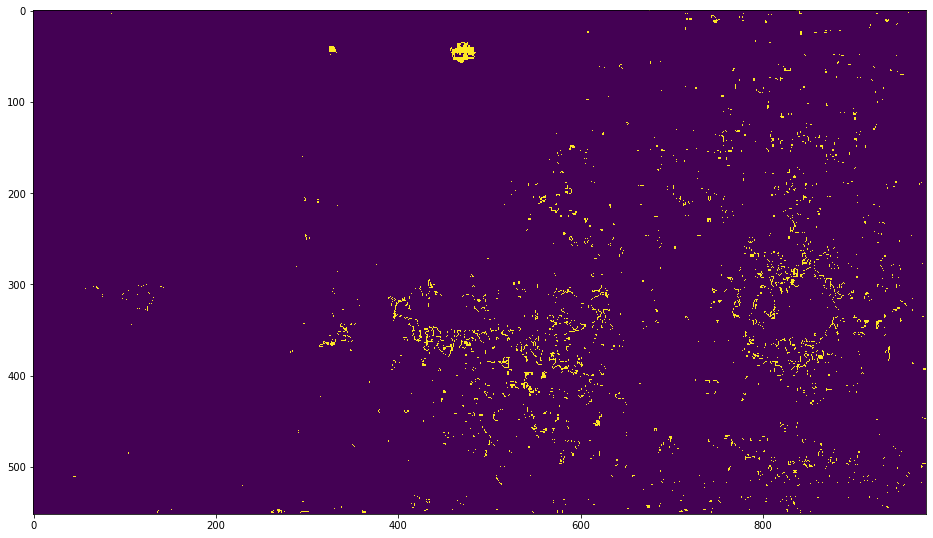

In [20]:
plt.figure(figsize=(16,16))
ret, b1 = cv2.threshold(img_hsv[:,:,0], 0, 1, cv2.THRESH_BINARY_INV)
plt.imshow(b1)

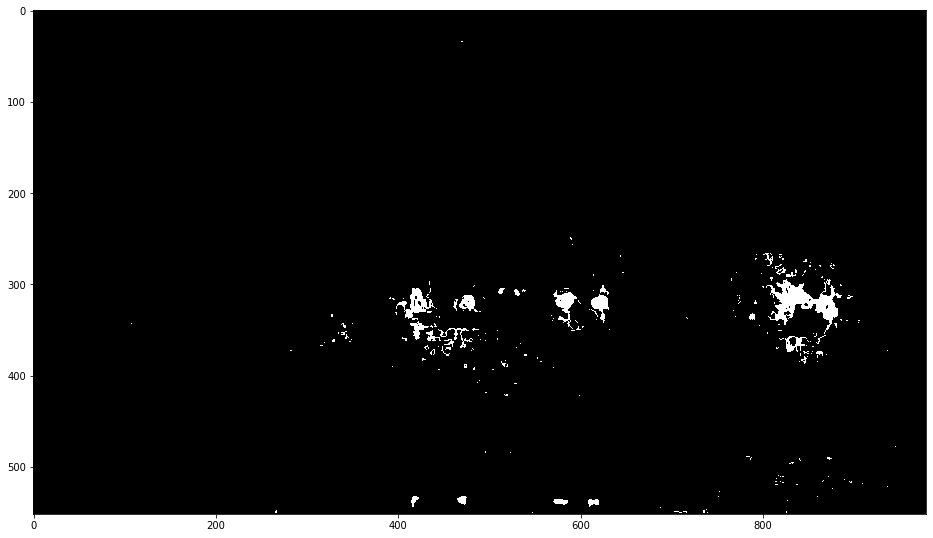

In [21]:
ret, b2 = cv2.threshold(img_hsv[:,:,0], 330/2, 1, cv2.THRESH_BINARY)
plt.figure(figsize=(16,16))
plt.imshow(b2, cmap='gray')

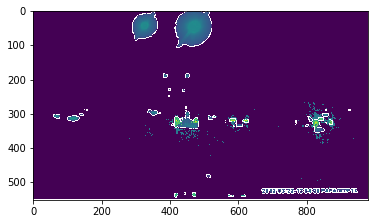

In [22]:

plt.imshow(img_threshold3+b2)

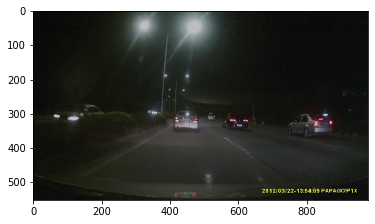

In [23]:
plt.imshow(img)